# Practical 5

## Aim : Applying and Demonstrating PCA on IRIS.csv Dataset

In [1]:
#importing the libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from bioinfokit.analys import get_data
import numpy as np
import pandas as pd

In [2]:
# load dataset as pandas dataframe
df = get_data('iris').data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = df.iloc[:,0:4]              # p variables
target = df['class'].to_numpy() # target variable

In [4]:
X_st = StandardScaler().fit_transform(X) # Scaling the independent variables
X_st = pd.DataFrame(X_st)
X_st.columns = X.columns

In [5]:
X_adjusted = X_st - X_st.mean()  # create mean adjusted matrix
X_adjusted.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [6]:
X_adjusted.cov()  # create covariance matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.006711,-0.110103,0.877605,0.823443
sepal_width,-0.110103,1.006711,-0.423338,-0.358937
petal_length,0.877605,-0.423338,1.006711,0.969219
petal_width,0.823443,-0.358937,0.969219,1.006711


In [7]:
# Interpretation of the covarience matrix
# 1. The diagonal element are the variences of the different variables.
#    A large diagonal values correspond to strong varience in a variable.
# 2. The off diagonal values are the covariences between variables.
#    They reflect distortions in the data (noise, redundency, etc).
#    Lagre off diagonal values correspond to "high distortions" in our data.

In [8]:
# Eigen decomposition of the covarience matrix
from numpy.linalg import eig
eigenvalues, eigenvectors = eig(X_adjusted.cov())

In [9]:
eigenvalues

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [10]:
eigenvectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [11]:
# sort the eigen values in descending order and select best number
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvalues

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [12]:
sorted_eigenvectors = eigenvectors[:,sorted_index]
sorted_eigenvectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [13]:
total = sum(eigenvalues)
variance_of_each_feature = [(i/total)*100 for i in eigenvalues]
print ("Variance of each feature --> ",variance_of_each_feature)

Variance of each feature -->  [72.77045209380132, 23.03052326768067, 3.683831957627387, 0.5151926808906194]


In [14]:
# Cumulative Variance
cum_var_exp = np.cumsum(variance_of_each_feature)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 72.77045209  95.80097536  99.48480732 100.        ]


In [15]:
features = eigenvectors[:2]
features

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481]])

In [16]:
# Compute the new dataset with Principal Components
eigenvector_subset = sorted_eigenvectors[:,0:2]

In [17]:
#Transform the data
X_reduced = np.dot(eigenvector_subset.transpose(),X_adjusted.transpose()).transpose()

In [18]:
X_reduced.shape

(150, 2)

In [19]:
#Creating a DataFrame of reduced Dataset
new_df = pd.DataFrame(X_reduced , columns = ['PC1','PC2'])
#Concat it with target variable to create a complete Dataset
new_df = pd.concat([new_df , pd.DataFrame(target)] , axis = 1)

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

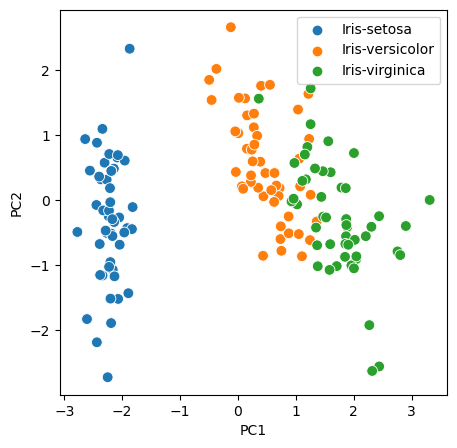

In [20]:
# Plot the data projected onto Principal Components
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
sb.scatterplot(data = new_df , x = 'PC1',y = 'PC2' , hue = target , s = 60)

In [21]:
# PCA class using sklearn
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_st)
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523 0.03683832 0.00515193]


In [22]:
pca_reduced = PCA(n_components = 2)
pca_new = pca_reduced.fit_transform(X_st)
print(pca_reduced.explained_variance_ratio_)

[0.72770452 0.23030523]


In [23]:
pca_new.shape

(150, 2)

In [24]:
#Creating a DataFrame of reduced Dataset
newsk_df = pd.DataFrame(pca_new , columns = ['PC1','PC2'])
#Concat it with target variable to create a complete Dataset
newsk_df = pd.concat([newsk_df , pd.DataFrame(target)] , axis = 1)

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

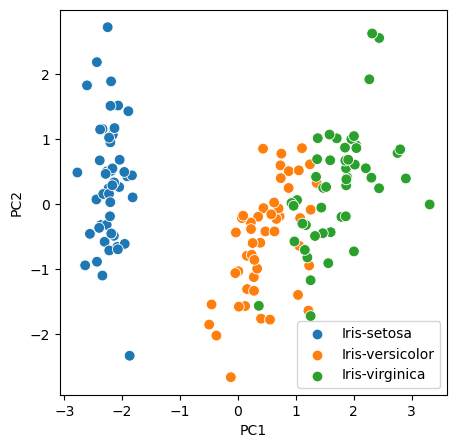

In [25]:
plt.figure(figsize = (5,5))
sb.scatterplot(data = newsk_df , x = 'PC1',y = 'PC2' , hue = target , s = 60)